In [33]:
#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch,Pitch,add_image
from PIL import Image
import urllib
from urllib.request import urlopen

from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import os
import matplotlib.font_manager as fm

In [2]:
font_path = "../assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if (y.split(".")[-1] == "ttf") or (y.split(".")[-1] == "otf"):
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue
                
plt.style.use("soc_base.mplstyle")

In [2]:
#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

#print a list of free competitions
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [3]:
#call the statsbombpy API to get a list of matches for a given competition
#Euro 2024 competition id = 55, season id = 282
euro_2024_matches = sb.matches(competition_id=53, season_id=106)

#print the first 5 matches listed
euro_2024_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3835331,2022-07-13,18:00:00.000,Europe - UEFA Women's Euro,2022,Sweden Women's,Switzerland Women's,2,1,available,...,2023-04-14T11:27:39.402579,2,Group Stage,Bramall Lane,Marta Huerta de Aza,Peter Gerhardsson,Nils Herbert Kromann Nielsen,1.1.0,2,2
1,3835324,2022-07-09,21:00:00.000,Europe - UEFA Women's Euro,2022,Netherlands Women's,Sweden Women's,1,1,available,...,2023-04-14T11:23:11.894822,1,Group Stage,Bramall Lane,Cheryl Foster,Mark Richard David Parsons,Peter Gerhardsson,1.1.0,2,2
2,3844384,2022-07-20,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Spain Women's,2,1,available,...,2023-04-26T02:03:52.207197,4,Quarter-finals,The American Express Community Stadium,Stéphanie Frappart,Sarina Glotzbach-Wiegman,Jorge Vilda,1.1.0,2,2
3,3847567,2022-07-31,18:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Germany Women's,2,1,available,...,2023-04-25T23:30:59.168837,6,Final,Wembley Stadium,Kateryna Monzul,Sarina Glotzbach-Wiegman,Martina Voss-Tecklenburg,1.1.0,2,2
4,3845506,2022-07-26,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Sweden Women's,4,0,available,...,2023-04-26T00:44:10.275394,5,Semi-finals,Bramall Lane,Esther Staubli,Sarina Glotzbach-Wiegman,Peter Gerhardsson,1.1.0,2,2


In [4]:
#call the statsbombpy events API to bring in the event data for the match
events_df = sb.events(match_id=3844384)

#print the first 5 rows of data
events_df.head(5)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England Women's,865,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",Spain Women's,863,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England Women's,865,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain Women's,863,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain Women's,863,00:00:00.000,Half Start,NaN


In [5]:
events_df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_other', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_shot_saved_off_target', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_an

In [6]:
events_df.player.unique()

array([nan, 'Esther Gonzalez Rodríguez', 'María Pilar León Cebrián',
       'Ona Batlle Pascual', 'Marta Cardona De Miguel', 'Leah Williamson',
       'Georgia Stanway', 'Rachel Daly', 'Patricia Guijarro Gutiérrez',
       'Teresa Abelleira Dueñas', 'Irene Paredes Hernandez',
       'Aitana Bonmati Conca', 'Lucy Bronze',
       'María Francesca Caldentey Oliver', 'Olga  Carmona García',
       'Mary Alexandra Earps', 'Lauren Hemp', 'Francesca Kirby',
       'Keira Walsh', 'Millie Bright', 'Sandra Paños García-Villamil',
       'Bethany Mead', 'Ellen White', 'Athenea del Castillo Belvide',
       'Alessia Russo', 'Chloe Kelly', 'Ella Toone',
       'Laia Aleixandri López', 'Sheila García Gómez', 'Alex Greenwood',
       'Amaiur Sarriegi', 'Jill Scott', 'Nikita Parris',
       'María Isabel Rodríguez Rivero'], dtype=object)

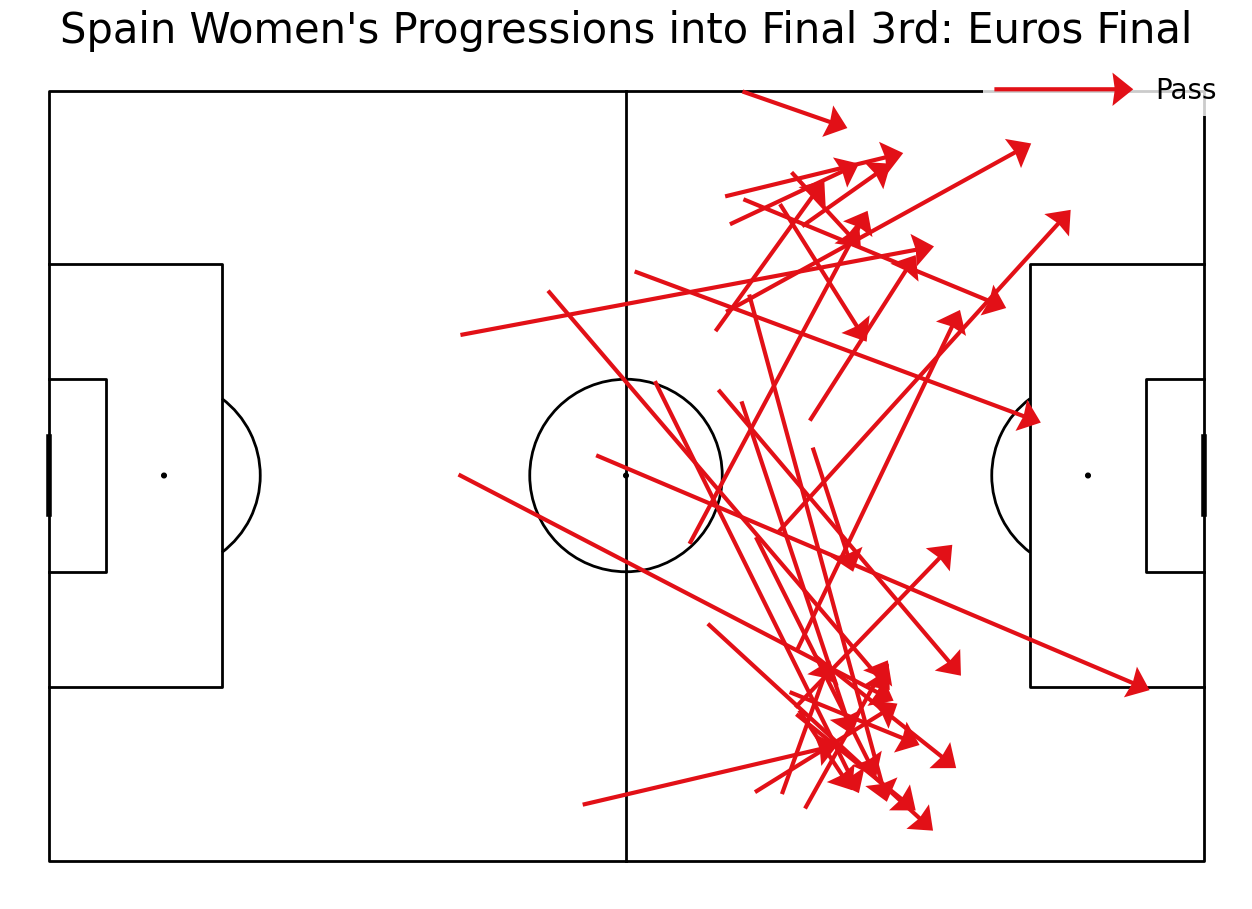

In [7]:
#separate start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

#create a variable for the team you want to look into
team="Spain Women's"

#filter for only matches that the focus team played in
matches_df = euro_2024_matches[(euro_2024_matches['home_team'] == team)|(euro_2024_matches['away_team'] == team)]

#filter for events done by the focus team
#filter by event type to get only passes
#filter for passes that started outside of the final third
#filter for passes that ended in the final third
#filter for completed passes
passes_df=events_df[(events_df.team==team)&(events_df.type=="Pass")&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())]

#Visualize for a team
pass_colour='#e21017'

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(passes_df.x, passes_df.y,
passes_df.pass_end_x, passes_df.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{team} Progressions into Final 3rd: Euros Final', fontsize=30,color='black')


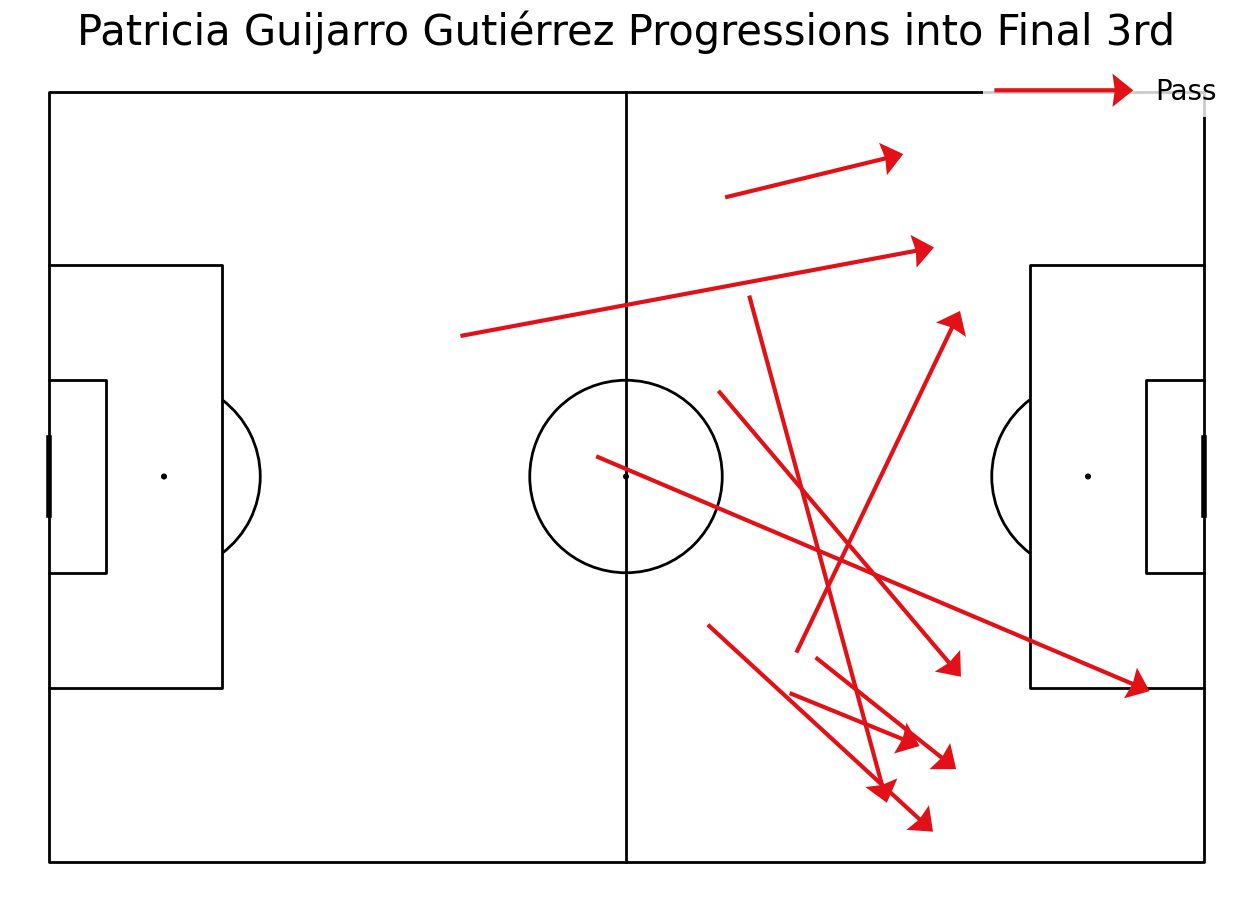

In [9]:
#Visualize for a given player

player_name="Patricia Guijarro Gutiérrez"

player_passes=events_df[(events_df.player==player_name)&(events_df.type=="Pass")&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())]

pass_colour='#e21017'

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd', fontsize=30,color='black')


In [18]:
euro_2024_matches.match_id.unique()

array([3835331, 3835324, 3844384, 3847567, 3845506, 3835335, 3835323,
       3835325, 3835320, 3845507, 3844387, 3844385, 3844386, 3835342,
       3835337, 3835338, 3835330, 3835329, 3835322, 3835332, 3835327,
       3835326, 3835341, 3835340, 3835339, 3835336, 3835334, 3835328,
       3835333, 3835321, 3835319])

In [19]:
sb.events(match_id=3835341, split=True, flatten_attrs=False)["dribbles"]

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,position,location,duration,under_pressure,related_events,dribble,match_id,possession_team_id,team_id,player_id
0,c024bee4-2db6-4daf-8742-6699c9ba540e,25,1,00:00:18.451,0,18,Dribble,2,Italy Women's,From Kick Off,...,Left Back,"[65.1, 2.0]",0.0,True,"[5add9039-3465-4c4c-a37a-7481415996c1, ffad2bb...","{'outcome': {'id': 8, 'name': 'Complete'}}",3835341,855,855,25770
1,b5b657b2-94d2-4d2a-bd57-f19622fda24a,170,1,00:04:20.645,4,20,Dribble,10,Belgium Women's,From Throw In,...,Left Back,"[75.5, 10.4]",0.0,True,[733ef349-100f-49f7-bb41-4ef1143fe46e],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3835341,854,854,10105
2,1d6f2386-aecc-4b3d-8642-edb81772ebc1,283,1,00:07:04.812,7,4,Dribble,19,Italy Women's,From Free Kick,...,Left Back,"[37.0, 20.5]",0.0,True,"[de720644-6bbb-49c1-be89-0ef8633e63f4, f1c92e6...","{'outcome': {'id': 8, 'name': 'Complete'}}",3835341,855,855,25770
3,203dcd7d-71e2-45ea-82ac-23b6501718e2,363,1,00:08:47.871,8,47,Dribble,22,Belgium Women's,Regular Play,...,Center Attacking Midfield,"[90.1, 8.8]",0.0,True,"[2567ec39-8aec-4edf-8c80-393446a62a4f, 70709e5...","{'outcome': {'id': 8, 'name': 'Complete'}}",3835341,854,854,10099
4,cc59f2de-017a-49db-a207-846f7aebd60a,446,1,00:10:05.957,10,5,Dribble,25,Italy Women's,Regular Play,...,Right Center Back,"[56.2, 50.5]",0.0,True,[0cb9eca2-0361-41fd-9861-d7c25f051f1f],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3835341,855,855,10371
5,bf6fd40e-de02-4a84-893d-be200db7759d,1152,1,00:26:30.681,26,30,Dribble,54,Italy Women's,Regular Play,...,Right Defensive Midfield,"[46.9, 52.8]",0.0,True,"[b0c2f5ea-8495-44f6-b4aa-d5cd2afe3118, db5071a...","{'outcome': {'id': 9, 'name': 'Incomplete'}}",3835341,855,855,45742
6,63197146-a94a-4430-8fda-3e0e1951c037,1482,1,00:35:17.898,35,17,Dribble,68,Italy Women's,Regular Play,...,Right Back,"[63.4, 75.9]",0.0,True,[f1128547-304a-4050-996d-ff58ba37a239],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3835341,855,855,46224
7,61a70e88-ecf4-4b7d-8ef0-cc11719f06a3,1561,1,00:36:51.563,36,51,Dribble,68,Italy Women's,Regular Play,...,Right Wing,"[102.6, 58.4]",0.0,True,[0dd83ff1-a8f3-4dac-8aeb-1b01a064d4d7],"{'outcome': {'id': 8, 'name': 'Complete'}}",3835341,855,855,10211
8,f1fccb85-62e5-4f2f-9a8f-0f336b8fa7d8,1573,1,00:37:28.538,37,28,Dribble,69,Italy Women's,From Throw In,...,Right Back,"[109.3, 77.2]",0.0,True,[9549141a-1fcb-4f07-a575-1b0c0d1e1449],"{'outcome': {'id': 8, 'name': 'Complete'}}",3835341,855,855,46224
9,f0d0842f-e347-4e6a-95c0-06b68c15bb59,1601,1,00:37:55.545,37,55,Dribble,69,Italy Women's,From Throw In,...,Left Back,"[63.2, 1.2]",0.0,True,[773dadc2-20c7-4ca5-aeef-5b32b9900c4e],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3835341,855,855,25770


In [5]:
grouped_events = sb.competition_events(
    country="Europe",
    division= "UEFA Women's Euro",
    season="2022",
    gender="female",
    split=True
)

In [6]:
grouped_events.keys()

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'blocks', 'dispossesseds', 'duels', 'ball_recoverys', 'interceptions', '50/50s', 'miscontrols', 'foul_committeds', 'foul_wons', 'shots', 'goal_keepers', 'clearances', 'dribbled_pasts', 'dribbles', 'injury_stoppages', 'referee_ball_drops', 'half_ends', 'substitutions', 'player_offs', 'player_ons', 'tactical_shifts', 'shields', 'errors', 'offsides', 'bad_behaviours', 'own_goal_againsts', 'own_goal_fors'])

In [75]:
df = grouped_events["miscontrols"]
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'match_id', 'possession_team_id',
       'team_id', 'player_id', 'under_pressure', 'related_events', 'out',
       'miscontrol_aerial_won', 'off_camera'],
      dtype='object')

In [27]:
passes = grouped_events["passes"]
# passes.under_pressure.unique()

passes_under_pressure = passes[passes['under_pressure']==True]
players = sorted(set(passes_under_pressure['player']))

# Initialise dictionary to store the data
player_passes = list()
for player in players:
    player_df = passes_under_pressure[passes_under_pressure['player'] == player]
    success = player_df[(player_df['pass_outcome'] == 'Incomplete') | (player_df['pass_outcome'] == 'Out') 
    | (player_df['pass_outcome'] == 'Unknown')  | (player_df['pass_outcome'] == 'Injury Clearance') 
    | (player_df['pass_outcome'] == 'Pass Offside')].shape[0]

    under_pressure = player_df.shape[0]
    success_rate = 1- success/under_pressure

    player_passes.append({"player": player, "under_pressure": under_pressure, "success_rate": success_rate, "team":player_df["team"].iloc[0]})

passes_df = pd.DataFrame(player_passes)

In [55]:
passes_df = passes_df.sort_values(by='under_pressure', ascending=False).reset_index(drop=True)
passes_df.head(10)

,player,under_pressure,success_rate,team
0,Keira Walsh,56,0.839286,England Women's
1,Patricia Guijarro Gutiérrez,50,0.760000,Spain Women's
2,Fridolina Rolfö,49,0.632653,Sweden Women's
3,María Francesca Caldentey Oliver,48,0.854167,Spain Women's
4,Gun Nathalie Björn,42,0.666667,Sweden Women's
5,Kosovare Asllani,42,0.595238,Sweden Women's
6,Kathrin Julia Hendrich,41,0.707317,Germany Women's
7,Lena Oberdorf,39,0.589744,Germany Women's
8,Georgia Stanway,38,0.736842,England Women's
9,Tinne De Caigny,38,0.605263,Belgium Women's


In [77]:
passes.pass_outcome.unique()

array([nan, 'Incomplete', 'Out', 'Unknown', 'Pass Offside',
       'Injury Clearance'], dtype=object)

In [9]:
df_grouped = passes.groupby(['player', 'team']).agg(
        total=('player', 'count'),
        through_balls=('pass_through_ball', 'count'),
        assists=('pass_goal_assist', 'count'), 
        chances=('pass_shot_assist', 'count'), 
        total_crosses=('pass_cross', 'count'),
        under_pressure=('under_pressure', 'count'), 
        cut_back=('pass_cut_back', 'count'), 
        switch=('pass_switch', 'count'),
    ).reset_index()

In [10]:
df_grouped = df_grouped.sort_values(by='under_pressure', ascending=False).reset_index(drop=True)
df_grouped.head(10)

,player,team,total,through_balls,assists,chances,total_crosses,under_pressure,cut_back,switch
0,Keira Walsh,England Women's,361,2,2,5,1,56,0,13
1,Patricia Guijarro Gutiérrez,Spain Women's,346,3,0,10,5,50,0,13
2,Fridolina Rolfö,Sweden Women's,180,1,1,7,14,49,1,6
3,María Francesca Caldentey Oliver,Spain Women's,296,0,1,14,9,48,2,14
4,Kosovare Asllani,Sweden Women's,211,5,3,11,17,42,5,6
5,Gun Nathalie Björn,Sweden Women's,234,3,0,6,2,42,0,3
6,Kathrin Julia Hendrich,Germany Women's,332,0,1,0,1,41,0,5
7,Lena Oberdorf,Germany Women's,186,0,1,2,5,39,0,3
8,Georgia Stanway,England Women's,211,1,0,2,8,38,0,2
9,Tinne De Caigny,Belgium Women's,176,1,0,1,0,38,0,2


In [11]:
shots = grouped_events["shots"]
shots.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_key_pass_id',
       'shot_technique', 'shot_body_part', 'shot_type', 'shot_outcome',
       'shot_freeze_frame', 'possession_team_id', 'team_id', 'player_id',
       'shot_first_time', 'shot_one_on_one', 'shot_deflected',
       'under_pressure', 'shot_aerial_won', 'shot_saved_off_target', 'out',
       'shot_saved_to_post', 'shot_open_goal', 'shot_redirect'],
      dtype='object')

In [12]:
green = '#6CABDD'
red = '#1C2C5B'
blue = '#FFC659'
violet = '#a369ff'
bg_color= '#ffffff'
line_color= '#000000'
col1 = '#F08700'
col2 = '#cb2217'
gold = '#ffc758'


In [70]:
# Function to create the bar chart
def sh_sq_bar(ax, shot_seq_counts):
    # Get top 10 players by total shot sequence involvement
    top10 = shot_seq_counts.head(20).iloc[::-1]

    # Plot horizontal bar chart
    ax.barh(top10['player'], top10['under_pressure'], height=0.75, label='Passes Under Pressure', color=red)
    # ax.barh(top10['shortName'], top10['Shot_Assist'], height=0.75, label='Shot Assist', color=green, left=top10['Shots'])
    # ax.barh(top10['shortName'], top10['Buildup_to_shot'], height=0.75, label='Buildup to Shot', color=col2, left=top10[['Shots', 'Shot_Assist']].sum(axis=1))

    # Add counts in the middle of the bars (if count > 0)
    for i, player in enumerate(top10['player']):
        for j, count in enumerate(top10[['under_pressure']].iloc[i]):
            if count > 0:
                x_position = sum(top10.iloc[i, 1:1+j]) + count / 2
                ax.text(x_position, i, str(count), ha='center', va='center', color=bg_color, fontsize=17, fontweight='bold')
        # Add total count at the end of the bar
        ax.text(top10['under_pressure'].max() + 4.4, i, f"{top10['success_rate'].iloc[i]:.1%}", ha='left', va='center', color=red, fontsize=12.5, fontweight='bold')
        ax.scatter(top10['under_pressure'].max() + 6.2, i, color=blue, s=1600)
        # Plotting the logos
    # for i, row in top10.iterrows():
        img = Image.open(f"C:\\Users\\MIRIRAI\\Documents\\Joel\\Analisis-de-fulbo-main\\flags\\{top10['team'].iloc[i].replace(" Women's", "")}.png").convert('RGBA')
        imagebox = OffsetImage(img, zoom=0.2)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (0, i), frameon=False, xybox=(-40, 0), xycoords='data', boxcoords="offset points")
        ax.add_artist(ab)
            
    ax.text(top10['under_pressure'].max() + 1.5, 20, "Success Rate", ha='left', va='center', color=red, fontsize=18)
    max_x = top10['under_pressure'].max()
    x_coord = [10 * i for i in range(1, int(max_x / 10))]
    for x in x_coord:
        ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

    ax.set_facecolor(bg_color)
    ax.tick_params(axis='x', colors=line_color, labelsize=15)
    ax.tick_params(axis='y', colors=line_color, labelsize=15, pad=75)
    ax.xaxis.label.set_color(line_color)
    ax.yaxis.label.set_color(line_color)
    for spine in ax.spines.values():
        spine.set_edgecolor(bg_color)

    # ax.set_title(title, color=line_color, fontsize=15, fontweight='bold')
    ax.legend(fontsize=12, loc='lower right')

In [71]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 16), facecolor='w', dpi = 600)
plt.rcParams['font.family'] = "DM Sans"

sh_sq_bar(ax, passes_df)

fig_text(
    x = 0.1, y = .95, 
    s = "Euro 2022 Passes Under Pressure",
    va = "bottom", ha = "center",
    fontsize = 30, color = "black", weight = "bold", family='Cal Sans'
)
fig_text(
	x = 0.125, y = .92, 
    s = "Probably better to do per 90, tbh. Data from Statsbomb",
    # highlight_textprops=[{"weight": "bold", "color": "black"}],
	va = "bottom", ha = "center",
    fontstyle="italic",
	fontsize = 18, color = red
)



fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/50.png'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}'))
# image_ax.imshow(club_icon)
# image_ax.axis('off')
ax_timage = add_image(club_icon, fig, left=0.8, bottom=0.93, width=0.060, height=0.060)



plt.savefig("../figures/weuro22_pup.png", dpi=600, facecolor="w", bbox_inches="tight", transparent=False)
plt.savefig("../figures/weuro22_pup_tr.png", dpi=600, facecolor="none", bbox_inches="tight", transparent=True)